In [2]:
import cv2
import matplotlib.pyplot as plt

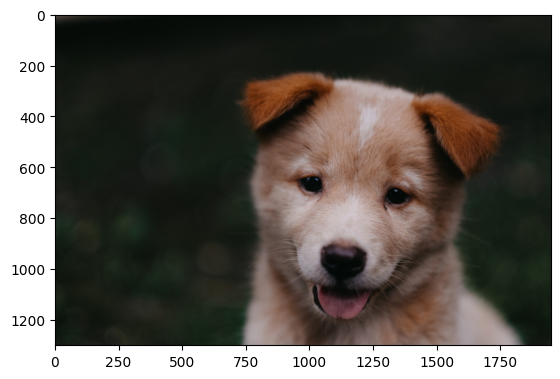

In [3]:
# convert rgb to hsv

img = cv2.imread('DATA/00-puppy.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

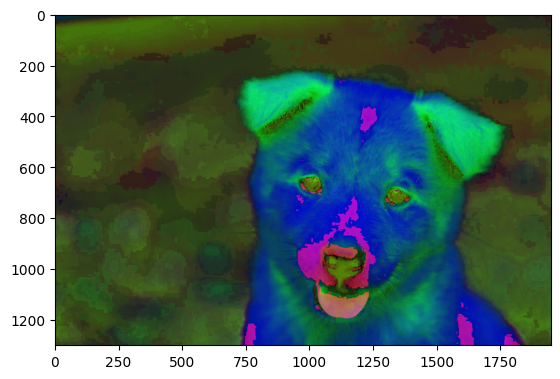

In [4]:
img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(img)

In [5]:
# Blending images together and pasting them on top of each other

img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

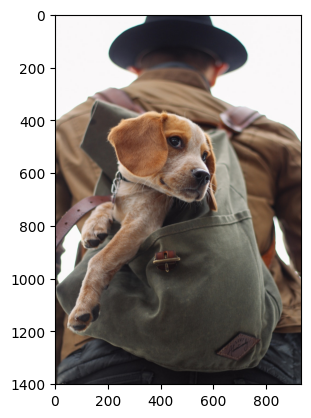

In [6]:
plt.imshow(img1)

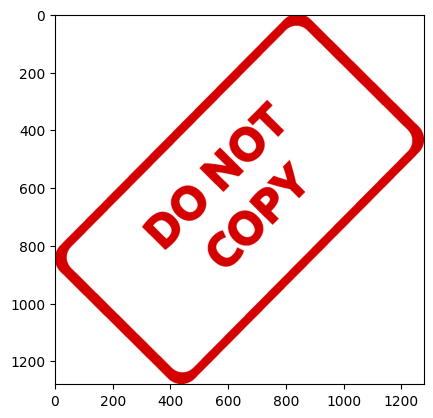

In [7]:
plt.imshow(img2)

In [8]:
img1.shape

(1401, 934, 3)

In [9]:
img2.shape

(1280, 1277, 3)

In [10]:
# BLENDING IMAGES OF THE SAME SIZE

img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

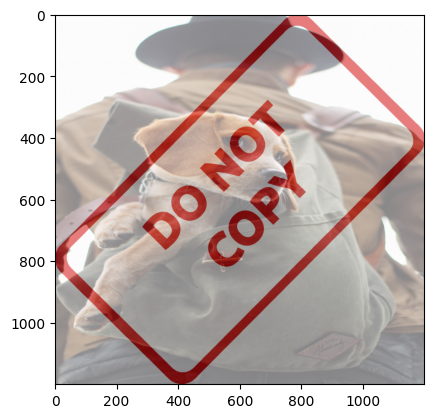

In [11]:
blended = cv2.addWeighted (src1=img1,alpha=0.5,src2=img2,beta=0.5,gamma=0)
plt.imshow(blended)

In [12]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment

In [13]:
# Blending images together and pasting them on top of each other

img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

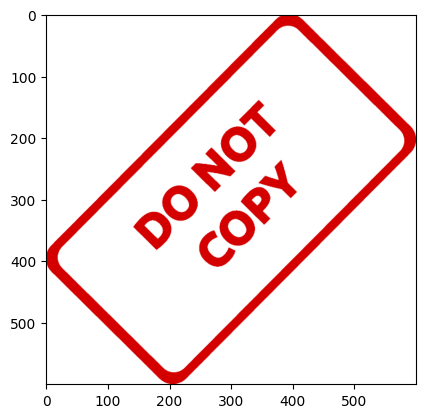

In [14]:
# resize img2 to be a lot smaller
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

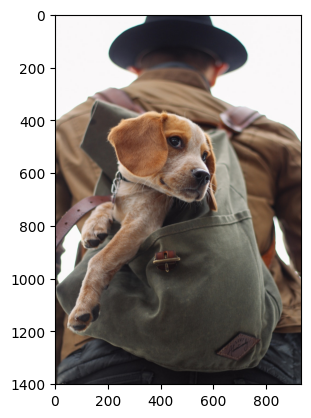

In [15]:
plt.imshow(img1)

In [16]:
large_img = img1
small_img = img2

In [17]:
x_offset = 0
y_offset = 0

In [18]:
x_end = x_offset + small_img.shape[1]   # get the width add to offset
y_end = y_offset + small_img.shape[0]   # get the height add to offset

In [19]:
large_img[y_offset:y_end,x_offset:x_end] = small_img 

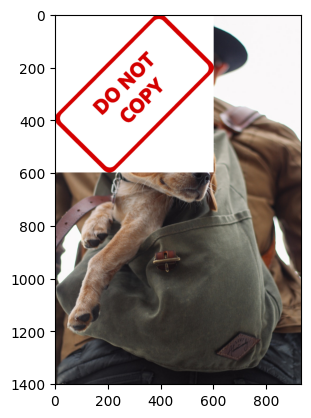

In [20]:
plt.imshow(large_img)

In [21]:
# Blend together images of different sizes

img1 = cv2.imread('DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [ ]:
# Resize to smaller image

img2 = cv2.resize(img2,(600,600))

In [23]:
# Grab the bottom right 
img1.shape

(1401, 934, 3)

In [24]:
# Calculate the top left corner with the bottom right corner at the bottom right edge

x_offset = 934 - 600
y_offset = 1401 - 600

In [25]:
img2.shape

(600, 600, 3)

In [26]:
rows,cols,channels = img2.shape

In [27]:
roi = img1[y_offset:1401,x_offset:943]

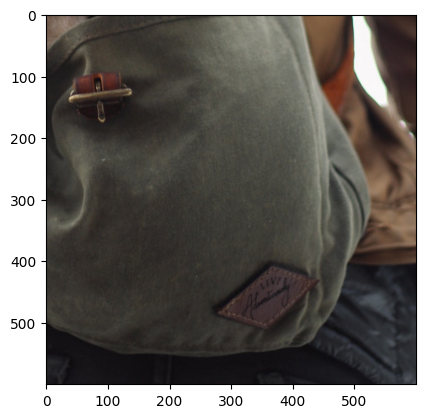

In [28]:
plt.imshow(roi)

In [29]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

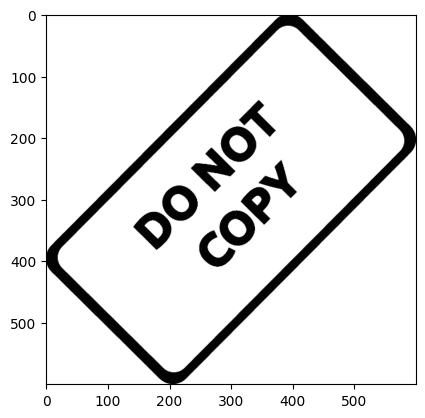

In [31]:
plt.imshow(img2gray,cmap='gray')

In [32]:
# Calculate the inversion
mask_inv = cv2.bitwise_not(img2gray)

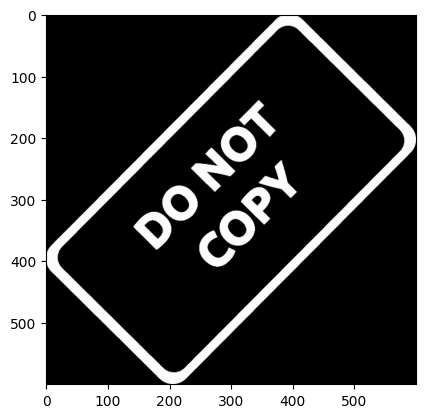

In [34]:
plt.imshow(mask_inv,cmap='gray')

In [35]:
mask_inv.shape

(600, 600)

In [ ]:
# It no longer has color channels, add it back using numpy
import numpy as np

# Create a blank white background
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [37]:
white_background.shape

(600, 600, 3)

In [38]:
# calculate the disjunction of 2 arrays
bk = cv2.bitwise_or(white_background, white_background,mask=mask_inv)

In [39]:
bk.shape

(600, 600, 3)

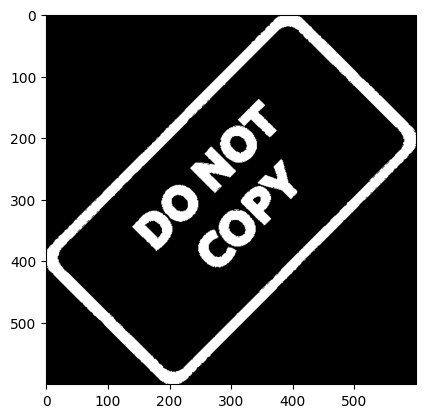

In [40]:
plt.imshow(bk)

In [41]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

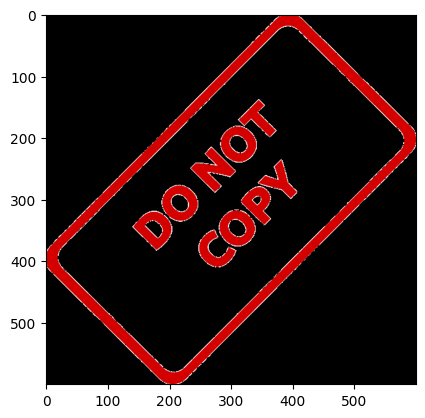

In [42]:
plt.imshow(fg)

In [44]:
final_roi = cv2.bitwise_or(roi,fg)

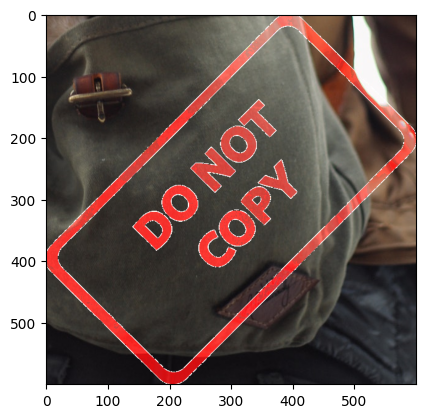

In [45]:
plt.imshow(final_roi)

In [46]:
large_img = img1
small_img = final_roi

In [49]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

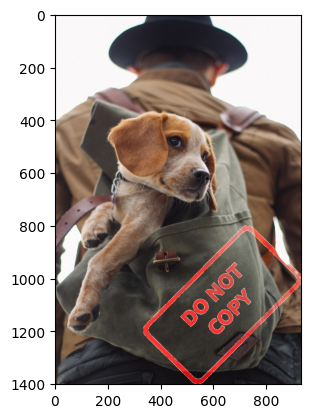

In [50]:
plt.imshow(large_img)